Model yang digunakan :

1. ML Model → Random Forest Regressor

Alasan: terbaik untuk tabular numeric, tahan outlier, tidak mudah overfitting.



Mengimpor library yang diperlukan untuk analisis data, preprocessing, machine learning, dan deep learning.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import random

# Reproducibility
np.random.seed(42)
random.seed(42)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/ML/midterm-regresi-dataset.csv", header=None)

df.columns = ["target"] + [f"feature_{i}" for i in range(1, df.shape[1])]
df.head()



Mounted at /content/drive


,target,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [ ]:
print(df.info())
df.describe()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515345 entries, 0 to 515344
Data columns (total 91 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   target      515345 non-null  int64  
 1   feature_1   515345 non-null  float64
 2   feature_2   515345 non-null  float64
 3   feature_3   515345 non-null  float64
 4   feature_4   515345 non-null  float64
 5   feature_5   515345 non-null  float64
 6   feature_6   515345 non-null  float64
 7   feature_7   515345 non-null  float64
 8   feature_8   515345 non-null  float64
 9   feature_9   515345 non-null  float64
 10  feature_10  515345 non-null  float64
 11  feature_11  515345 non-null  float64
 12  feature_12  515345 non-null  float64
 13  feature_13  515345 non-null  float64
 14  feature_14  515345 non-null  float64
 15  feature_15  515345 non-null  float64
 16  feature_16  515345 non-null  float64
 17  feature_17  515345 non-null  float64
 18  feature_18  515345 non-null  float64
 19  fe

,target,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


In [ ]:
print(df.isna().sum().head())

# Isi missing values menggunakan median karena lebih stabil terhadap outlier
df = df.fillna(df.median())



target       0
feature_1    0
feature_2    0
feature_3    0
feature_4    0
dtype: int64


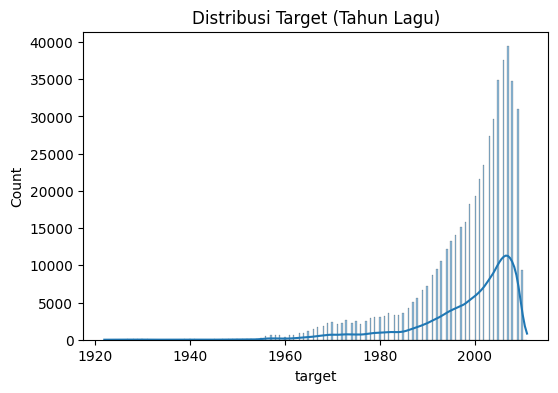

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df["target"], kde=True)
plt.title("Distribusi Target (Tahun Lagu)")
plt.show()

# Clipping outlier (1%–99%)
for col in df.columns[1:]:
    q1, q3 = df[col].quantile(0.01), df[col].quantile(0.99)
    df[col] = np.clip(df[col], q1, q3)


In [ ]:
X = df.drop("target", axis=1)
y = df["target"]



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
rf = RandomForestRegressor(
    n_estimators=150,# ringan untuk colab
    max_depth=18,
    min_samples_split=4,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=18, min_samples_split=4, n_estimators=150,
                      n_jobs=-1, random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, rf_pred)
mse = mean_squared_error(y_test, rf_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, rf_pred)

print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)



MAE : 6.435622037378356
RMSE: 9.118528168504525
R²  : 0.30136922267853583


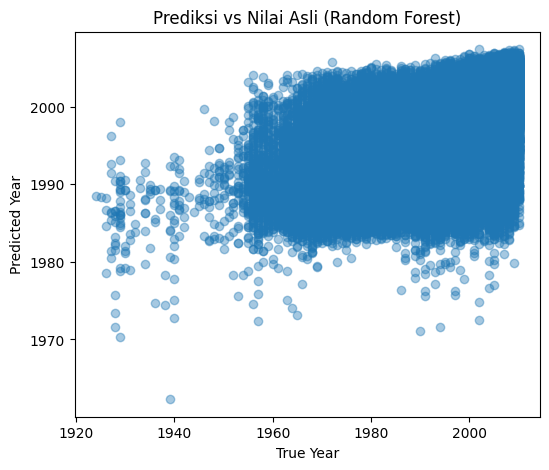

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(y_test, rf_pred, alpha=0.4)
plt.xlabel("True Year")
plt.ylabel("Predicted Year")
plt.title("Prediksi vs Nilai Asli (Random Forest)")
plt.show()


Mengapa Random Forest?

1. Sangat bagus untuk tabular data

2. Tahan outlier

3. Tidak butuh scaling

4. Tidak mudah overfitting

5. Performa hampir selalu tinggi pada dataset numerik